In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Exercício 1**: Implemente uma função que crie um neurônio de McCulloch-Pitts. Esta função receberá o vetor de entradas, o vetor de pesos e o bias e retornará a saída calculada.

In [ ]:
def hardlim(value):
  if value >= 0:
    return 1 
  else:
    return 0

In [ ]:
def Ex1_NMCP(Input,Weights,Bias):
  Output = hardlim(np.dot(Input,Weights) + Bias)
  return Output

In [ ]:
Ex1_Input = np.random.uniform(-10,10,2)
Ex1_Weights = np.random.uniform(-1,1,2)
Ex1_Threshold = 1

print('Entrada utilizada no neurônio (aleatório): ', Ex1_Input)
print('\nPesos utilizados no neurônio (aleatório): ', Ex1_Weights)

Y = Ex1_NMCP(Ex1_Input,Ex1_Weights,Ex1_Threshold) # Neurônio de McCulloch-Pitts
print('\nSaída obtida: ',Y)

Entrada utilizada no neurônio (aleatório):  [7.36316733 3.80703428]

Pesos utilizados no neurônio (aleatório):  [-0.19411461 -0.38304958]

Saída obtida:  0


# **Exercício 2**: Utilizando o neurônio implementado no item anterior, modifique os pesos e o limiar de modo que o neurônio seja capaz de emular a função lógica NAND de dois bits. Mostre a reta de separação. Faça o mesmo para as funções OR e XOR. Caso não seja possível encontrar uma reta de separação, discuta o motivo.

In [ ]:
def Print_matrix(Matrix):
  Lines = len(Matrix)
  Columns = len(Matrix[0])
  #print(Lines,Columns)
  for i in range(Lines):
      for j in range(Columns):
          if(j == Columns - 1):
              print(" %d " %Matrix[i][j], end = "\n")
          else:
              print(" %d " %Matrix[i][j], end = "")
  print()

In [ ]:
Logical_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
print('Entada lógica de 2 bits:')
Print_matrix(Logical_input)


Entada lógica de 2 bits:
 0  0 
 0  1 
 1  0 
 1  1 



In [ ]:
def Ex2_NMCP(Input,Weights,Bias):
  Output = np.zeros((len(Input),1))
  for Index,Data in enumerate(Input):
    Output[Index] = hardlim(np.dot(Input[Index],Weights) + Bias)
  return Output

In [ ]:
def plotline(Input, Weights, Threshold,Y):
  for Index1,Data1 in enumerate(Input):
    plt.plot(Data1[0], Data1[1],'.k','MarkerSize',20)
    plt.text((Data1[0]-0.1), (Data1[1]-0.1), f'{Data1[0], Data1[1]} = {Y[Index1]}')
  x2 = np.linspace(-.15,1.5,100)
  x1 = (-Threshold/Weights[0]) - (x2*Weights[1]/Weights[0])
  plt.plot(x1,x2)
  plt.xlabel('X 1')
  plt.ylabel('X 2')
  plt.grid
  plt.axis([-.15, 1.5, -.15, 1.5])
  plt.show()

<<< Porta lógica NAND >>>

Limiar utilizado no neurônio:  2.5

Pesos utilizados no neurônio:  [-2 -2]

Saída obtida: Possível.
 1 
 1 
 1 
 0 



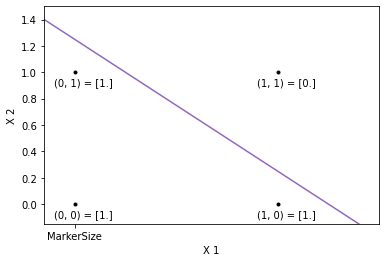

In [ ]:
NAND_Weights = np.array([-2, -2])
NAND_Threshold = 2.5
print('<<< Porta lógica NAND >>>')
print('\nLimiar utilizado no neurônio: ', NAND_Threshold)
print('\nPesos utilizados no neurônio: ', NAND_Weights)
NAND_Y = Ex2_NMCP(Logical_input,NAND_Weights,NAND_Threshold)
print('\nSaída obtida: Possível.')
Print_matrix(NAND_Y)
plotline(Logical_input,NAND_Weights,NAND_Threshold,NAND_Y)

<<< Porta lógica OR >>>

Limiar utilizado no neurônio:  -3.5

Pesos utilizados no neurônio:  [3 3]

Saída obtida: Possível.
 0 
 0 
 0 
 1 



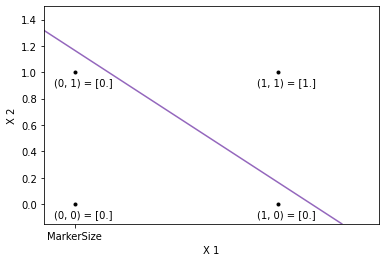

In [ ]:
OR_Weights = np.array([3, 3])
OR_Threshold = -3.5
print('<<< Porta lógica OR >>>')
print('\nLimiar utilizado no neurônio: ', OR_Threshold)
print('\nPesos utilizados no neurônio: ', OR_Weights)
OR_Y = Ex2_NMCP(Logical_input, OR_Weights, OR_Threshold)
print('\nSaída obtida: Possível.')
Print_matrix(OR_Y)
plotline(Logical_input,OR_Weights,OR_Threshold,OR_Y)

<<< Porta lógica XOR >>>

Limiar utilizado no neurônio:  -0.5

Pesos utilizados no neurônio:  [-1  1]

Saída obtida: Não é possível.
 0 
 1 
 0 
 0 



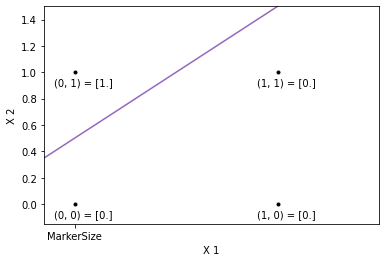

In [ ]:
XOR_Weights = np.array([-1, 1])
XOR_Threshold = -0.5
print('<<< Porta lógica XOR >>>')
print('\nLimiar utilizado no neurônio: ', XOR_Threshold)
print('\nPesos utilizados no neurônio: ', XOR_Weights)
XOR_Y = Ex2_NMCP(Logical_input, XOR_Weights, XOR_Threshold)
print('\nSaída obtida: Não é possível.')
Print_matrix(XOR_Y)
plotline(Logical_input,XOR_Weights,XOR_Threshold,XOR_Y)

# **Exercício 3:** A tabela a seguir apresenta alguns exemplos de tomada de decisão que foram feitos por um especialista em análise de crédito. Ajuste um neurônio artificial que simula as decisões do especialista. Caso não seja possível encontrar uma reta de separação, discuta o motivo.


In [ ]:
Idade = np.array([18, 19, 25, 40, 21, 22])
Sexo = np.array([1, 1, 0, 1, 1, 0]) # 1 para M e 0 para F
Casa = np.array([0, 1, 0, 1, 0, 1]) # 1=S e 0=N
Carro = np.array([1, 1, 0, 0, 0, 1]) # 1=S e 0=N
Casado = np.array([0, 1, 1, 1, 0, 1]) # 1=S e 0=N
Filhos = np.array([0, 1, 2, 4, 0, 2])
Renda = np.array([1200, 700, 800, 800, 1100, 500])

Credito = np.array([Idade, Sexo, Casa, Carro, Casado, Filhos, Renda])
Credito = Credito.T
print('Tabela de crédito (0 = [Não e F] e 1 = [Sim e M]): ')
Print_matrix(Credito)

R = np.array([0, 1, 1, 0, 1, 0])
Resposta = np.array([R])
Resposta = Resposta.T
print('Resposta encontrada para esta tabela de credito (0 = Não e 1 = Sim): ', )
print(Resposta)

Tabela de crédito (0 = [Não e F] e 1 = [Sim e M]): 
 18  1  0  1  0  0  1200 
 19  1  1  1  1  1  700 
 25  0  0  0  1  2  800 
 40  1  1  0  1  4  800 
 21  1  0  0  0  0  1100 
 22  0  1  1  1  2  500 

Resposta encontrada para esta tabela de credito (0 = Não e 1 = Sim): 
[[0]
 [1]
 [1]
 [0]
 [1]
 [0]]


In [ ]:
def Ex3_NMCP(Input,Weights,Bias):
  Output = np.zeros((len(Input),1))
  for Index,Data in enumerate(Input):
    Output[Index] = hardlim(np.dot(Input[Index],Weights) + Bias)
  return Output

In [ ]:
Iteracao = 0
Solution = [[]]
while True:
  Weights = np.random.uniform(-5,5,7)
  Threshold = np.random.uniform(-1,1,1)
  Ex3_Y = Ex3_NMCP(Credito,Weights,Threshold)
  if np.array_equal(Ex3_Y, Resposta):
      Solucao = "Peso correto"
      print('\nPesos encontrados: ', Weights, Threshold, '\n', Solucao)
      Solution.append([Weights, Threshold])
  else:
      Solucao = "Errada"
  if len(Solution) == 4:
    break

  Iteracao = Iteracao + 1
  if Iteracao % 10**7 == 0:
    print(Iteracao)
print('\nLista com as soloções encontradas:', Solution)

10000000

Pesos encontrados:  [ 2.26826342e-02  3.83117090e-01  1.78764431e+00 -3.99247444e+00
  4.86021827e+00 -2.72026277e+00  1.01309046e-03] [0.73574747] 
 Peso correto
20000000
30000000

Pesos encontrados:  [ 0.36506373  3.40719869 -1.99882348 -4.51554682  4.60608782 -4.82854022
 -0.00577165] [0.61421981] 
 Peso correto
40000000

Pesos encontrados:  [ 1.06717472e-01  7.50546609e-01  1.57577392e+00 -2.88723936e+00
  4.48315106e+00 -3.01031931e+00 -2.27044496e-04] [-0.09994727] 
 Peso correto
[[], [array([ 2.26826342e-02,  3.83117090e-01,  1.78764431e+00, -3.99247444e+00,
        4.86021827e+00, -2.72026277e+00,  1.01309046e-03]), array([0.73574747])], [array([ 0.36506373,  3.40719869, -1.99882348, -4.51554682,  4.60608782,
       -4.82854022, -0.00577165]), array([0.61421981])], [array([ 1.06717472e-01,  7.50546609e-01,  1.57577392e+00, -2.88723936e+00,
        4.48315106e+00, -3.01031931e+00, -2.27044496e-04]), array([-0.09994727])]]


In [ ]:
Idade1 = np.array([23, 54, 42])
Sexo1 = np.array([1, 1, 0]) # 1 para M e 0 para F
Casa1 = np.array([0, 1, 1]) # 1=S e 0=N
Carro1 = np.array([0, 1, 1]) # 1=S e 0=N
Casado1 = np.array([0, 0, 0]) # 1=S e 0=N
Filhos1 = np.array([0, 2, 1])
Renda1 = np.array([500, 5000, 3000])

Credito1 = np.array([Idade1, Sexo1, Casa1, Carro1, Casado1, Filhos1, Renda1])
Credito1 = Credito1.T
print('Tabela de crédito dos entrevistados (0 = [Não e F] e 1 = [Sim e M]): ')
Print_matrix(Credito1)

for L,D in enumerate(Solution):
  if L>0:
    Ex3_YE = Ex3_NMCP(Credito1,Solution[L][0],Solution[L][1])
    print('Resposta encontrada para esta tabela de credito (0 = Não e 1 = Sim) com os seguintes pesos: ', )
    print(Solution[L][0],Solution[L][1])
    print(Ex3_YE)

Tabela de crédito dos entrevistados (0 = [Não e F] e 1 = [Sim e M]): 
 23  1  0  0  0  0  500 
 54  1  1  1  0  2  5000 
 42  0  1  1  0  1  3000 

Resposta encontrada para esta tabela de credito (0 = Não e 1 = Sim) com os seguintes pesos: 
[ 2.26826342e-02  3.83117090e-01  1.78764431e+00 -3.99247444e+00
  4.86021827e+00 -2.72026277e+00  1.01309046e-03] [0.73574747]
[[1.]
 [0.]
 [0.]]
Resposta encontrada para esta tabela de credito (0 = Não e 1 = Sim) com os seguintes pesos: 
[ 0.36506373  3.40719869 -1.99882348 -4.51554682  4.60608782 -4.82854022
 -0.00577165] [0.61421981]
[[1.]
 [0.]
 [0.]]
Resposta encontrada para esta tabela de credito (0 = Não e 1 = Sim) com os seguintes pesos: 
[ 1.06717472e-01  7.50546609e-01  1.57577392e+00 -2.88723936e+00
  4.48315106e+00 -3.01031931e+00 -2.27044496e-04] [-0.09994727]
[[1.]
 [0.]
 [0.]]


In [ ]:
plotline(Logical_input,XOR_Weights,XOR_Threshold,XOR_Y)

Pesos encontrados:  [-0.10991201 -2.63784883  2.3175253  -4.10838198  4.84909344 -2.2327835
  0.00558804] [0.0201338]
 Peso correto 

Pesos encontrados:  [-0.69530116 -1.97015177  4.99920825 -4.97295083  3.80304874  0.78635278
  0.01558475] [0.66236903]
 Peso correto 

Pesos encontrados:  [ 0.46062103  1.58188368 -2.6244864  -2.6094841   4.94072102 -4.90874348
 -0.00762809] [0.87245338]
 Peso correto 

Pesos encontrados:  [-0.41550394 -3.16974406  3.44591032 -2.43165894  2.6025638  -0.02164133
  0.01075665] [0.14119824] 
 Peso correto

Pesos encontrados:  [-0.09716393 -3.29186075  3.7616937  -3.05895968  3.67186736 -2.82556735
  0.00467783] [0.92540238] 
 Peso correto

 Pesos encontrados:  [-0.67296714  1.82909655  1.51237001 -3.79202704  3.99493328  1.91080936
  0.01232587] [-0.72908944] 
 Peso correto